In [149]:
import pandas as pd
d_geo=pd.read_csv('/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/dgeo_home_most_freq.csv',
                       sep=',')
lat_min,lat_max=(41.2,51.1)
lon_min,lon_max=(2.31,9.15)
d_geo_home_freq_france=d_geo[(d_geo.lat>=lat_min) & (d_geo.lat<=lat_max) & (d_geo.lon>=lon_min) & (d_geo.lon<=lon_max)]
print(d_geo_home_freq_france.shape)
d_geo_home_freq_france.head()


(20199, 6)


,usr,lat,lon,nb_loc,total_geo,proba
68,205306385,48.856700,2.350800,3,8,0.375000
88,281555005,43.748502,7.443692,1,11,0.090909
111,1031321473,43.151327,3.179215,1,6,0.166667
144,1596692773,41.926686,8.745523,1,1,1.000000
151,270446771,48.856700,2.350800,3,22,0.136364


In [124]:
from tqdm import tqdm
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
df_insee=pd.read_csv('/datastore/complexnet/jlevyabi/geoloc/final.csv')

In [125]:
# Cast into polygon
import re;pat = re.compile(r'''(-*\d+\.\d+ -*\d+\.\d+);*''');new_geo=[]
for geo in tqdm(df_insee.geometry_y):
    matches = pat.findall(geo)
    if matches:¡
        lst = Polygon([tuple(map(float, m.split())) for m in matches])
    else:
        lst=None
    new_geo.append(lst)
df_insee.geometry_y=new_geo

100%|██████████| 2278213/2278213 [03:13<00:00, 11751.33it/s]


In [126]:
#Create soc_econ dictionary
dic_soc_info={};prec=2
for ind,row in tqdm(df_insee.iterrows()):
    geo=row.geometry_y
    geo_spa_center=(str(round(geo.centroid.y,prec)),str(round(geo.centroid.x,prec)))
    dic_soc_info[geo_spa_center]=row

2278213it [21:24, 1773.27it/s]


In [212]:
income=[]
for it,user_rows in tqdm(d_geo.iterrows()):
    try:
        income.append(dic_soc_info[(str(round(user_rows.lat,prec)),str(round(user_rows.lon,prec)))]['income'])
    except:
        income.append(None)
        pass
d_geo["income"]=income
d_geo=d_geo.dropna(how='any')

45443it [00:16, 2839.53it/s]


In [214]:
newd=d_geo[(d_geo.lat!=48.8567)
                            & (d_geo.lon!=2.3508)]

newd[["lat","lon"]].groupby(["lat","lon"]).size().sort_values()

lat        lon      
41.379739   9.201919      1
48.843830   2.293020      1
48.843852   2.293016      1
48.843869   2.252916      1
48.843879   2.235888      1
48.843902   2.324472      1
48.843934   2.347990      1
48.844087   2.391759      1
48.844091   2.323182      1
48.844112   2.645135      1
48.844167   2.275278      1
48.844232   2.363932      1
48.843749   2.381909      1
48.844244   2.526146      1
48.844280   2.285210      1
48.844320   2.788231      1
48.844444   2.376865      1
48.844456   2.276292      1
48.844457   2.318521      1
48.844458   2.285681      1
48.844568   2.328788      1
48.844572   2.440279      1
48.844610   2.341740      1
48.844612   2.252063      1
48.844623   2.383406      1
48.844278   2.375908      1
48.844623   2.261628      1
48.843702   2.360003      1
48.843669   2.352400      1
48.843208   2.331020      1
                       ... 
49.900000   2.300000     35
48.859026   2.298117     35
47.466700  -0.550000     35
48.000000   0.200000     38

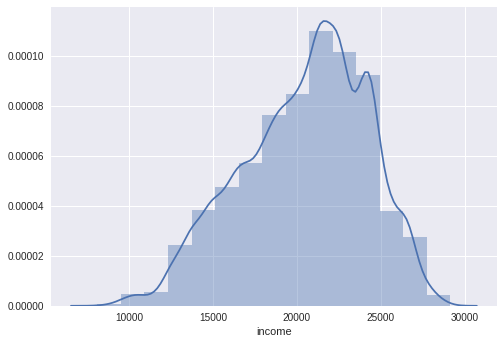

In [222]:
sns.distplot(newd.income,bins=15)
sns.plt.show()

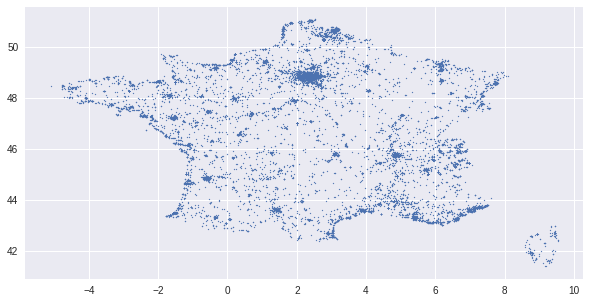

In [216]:
sns.plt.figure(figsize=(10,5))
sns.plt.scatter(newd.lon,newd.lat,s=1)
sns.plt.show()

### newd.to_csv(header=True,path_or_buf='/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/dgeo_france_most_freq.csv')

In [ ]:
import mpld3

mpld3.enable_notebook()
